In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



Multilayer Perceptrons[MLP] model

In [3]:
# Define MLP model
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Using a subset of data for RBFN due to computational constraints
subset_size = 10000
X_train_subset = X_train[:subset_size].reshape(subset_size, -1)
y_train_subset = y_train[:subset_size]
X_test_subset = X_test.reshape(len(X_test), -1)
y_test_subset = y_test

# Encode labels
y_train_encoded = np.argmax(y_train_subset, axis=1)
y_test_encoded = np.argmax(y_test_subset, axis=1)



Epoch 1/20
625/625 [==============================] - 26s 38ms/step - loss: 2.2440 - accuracy: 0.1449 - val_loss: 2.1271 - val_accuracy: 0.2178
Epoch 2/20
625/625 [==============================] - 23s 37ms/step - loss: 2.1513 - accuracy: 0.1698 - val_loss: 2.1027 - val_accuracy: 0.2132
Epoch 3/20
625/625 [==============================] - 21s 34ms/step - loss: 2.1353 - accuracy: 0.1778 - val_loss: 2.1008 - val_accuracy: 0.2168
Epoch 4/20
625/625 [==============================] - 22s 35ms/step - loss: 2.1309 - accuracy: 0.1778 - val_loss: 2.1011 - val_accuracy: 0.2336
Epoch 5/20
625/625 [==============================] - 20s 33ms/step - loss: 2.1235 - accuracy: 0.1830 - val_loss: 2.0965 - val_accuracy: 0.2139
Epoch 6/20
625/625 [==============================] - 23s 36ms/step - loss: 2.1173 - accuracy: 0.1843 - val_loss: 2.0951 - val_accuracy: 0.2049
Epoch 7/20
625/625 [==============================] - 22s 35ms/step - loss: 2.1120 - accuracy: 0.1874 - val_loss: 2.0881 - val_accuracy:

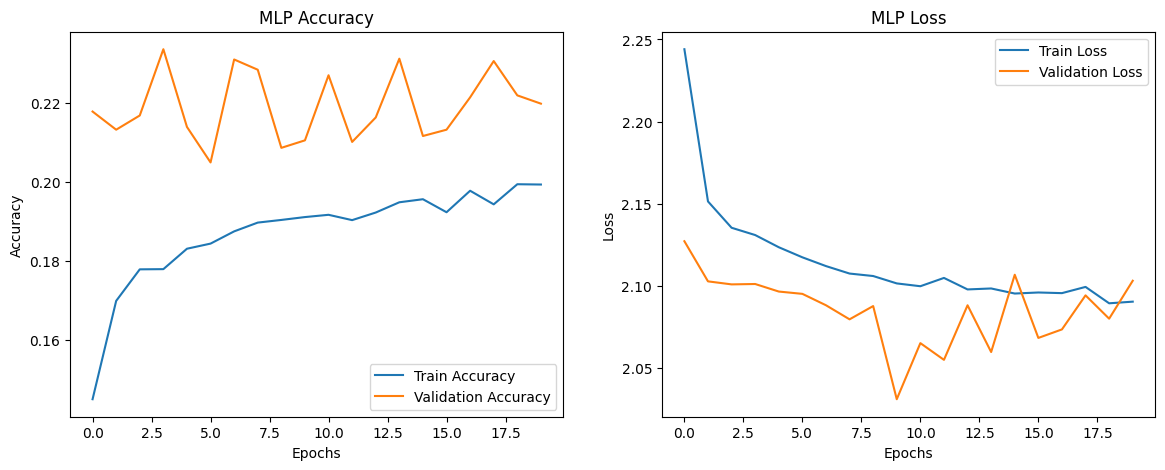

In [4]:
# Plotting MLP training history
plt.figure(figsize=(14, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['accuracy'], label='Train Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['loss'], label='Train Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('MLP Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


RBFN Model

In [5]:
# Define and train RBFN model
rbf_model = SVC(kernel='rbf', gamma='scale')
rbf_model.fit(X_train_subset, y_train_encoded)

# Predict and evaluate
y_pred = rbf_model.predict(X_test_subset)
rbf_accuracy = accuracy_score(y_test_encoded, y_pred)



Comparison of MLP and RBFN

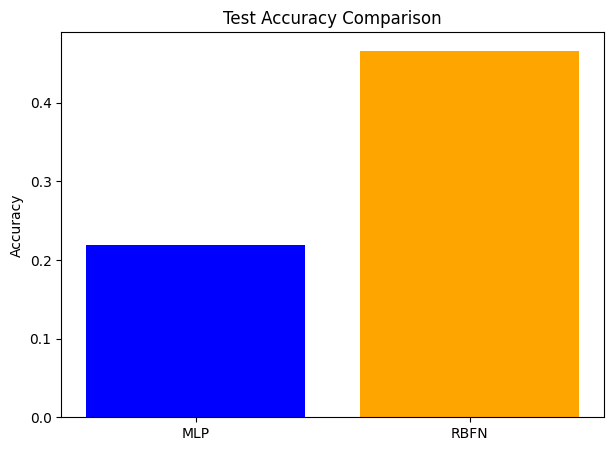

RBFN Test Accuracy: 46.65%
MLP Test Accuracy: 21.98%


In [6]:
# Plot comparison of MLP and RBFN
plt.figure(figsize=(7, 5))

# Plot MLP test accuracy (last validation accuracy)
mlp_test_accuracy = mlp_history.history['val_accuracy'][-1]
plt.bar(['MLP', 'RBFN'], [mlp_test_accuracy, rbf_accuracy], color=['blue', 'orange'])

plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

print(f'RBFN Test Accuracy: {rbf_accuracy * 100:.2f}%')
print(f'MLP Test Accuracy: {mlp_test_accuracy * 100:.2f}%')
